In [2]:
import pandas as pd

In [3]:
import chromalyzer

In [4]:
raw_sample = pd.read_csv('/usr/scratch/NASA/raw/230823_06_Jarosite_Soil_300uLDCM_100oC24h.csv')

In [8]:
M_Z = 30
threshold = 0.5
raw_sample[(raw_sample['M/Z'] > M_Z - threshold) & (raw_sample['M/Z'] < M_Z + threshold)]


,Spectrum,1st Time (s),2nd Time (s),TOF,M/Z,Area,Resolution
0,0,2200.00,0.000,117248.168,30.00884,376.00,10720
1,0,2200.00,0.000,117313.340,30.04225,49.44,11552
131,1,2200.00,0.008,117248.145,30.00883,393.50,10048
132,1,2200.00,0.008,117313.531,30.04235,66.88,11232
273,2,2200.00,0.016,117248.105,30.00881,403.50,9536
...,...,...,...,...,...,...,...
203195408,1044998,10557.04,2.944,117299.484,30.03514,27.22,12384
203195409,1044998,10557.04,2.944,117313.004,30.04208,301.00,12576
203195726,1044999,10557.04,2.952,117248.004,30.00875,1486.00,13920
203195727,1044999,10557.04,2.952,117299.438,30.03512,28.00,12256


In [10]:
raw_sample

,Spectrum,1st Time (s),2nd Time (s),TOF,M/Z,Area,Resolution
0,0,2200.00,0.000,117248.168,30.00884,376.00,10720
1,0,2200.00,0.000,117313.340,30.04225,49.44,11552
2,0,2200.00,0.000,119162.816,30.99811,2952.00,20704
3,0,2200.00,0.000,121051.137,31.98950,5944.00,17760
4,0,2200.00,0.000,121114.773,32.02318,76.88,15968
...,...,...,...,...,...,...,...
203196043,1044999,10557.04,2.952,439384.430,422.17132,24.34,35712
203196044,1044999,10557.04,2.952,441359.938,425.97731,52.38,25728
203196045,1044999,10557.04,2.952,442966.852,429.08576,19.44,33120
203196046,1044999,10557.04,2.952,460617.766,463.97393,142.00,29440


In [11]:
def heatmap(df : pd.DataFrame, first_time_column_name : str = '1st Time (s)', second_time_column_name : 
            str = '2nd Time (s)', area_column_name : str = 'Area') -> pd.DataFrame:
    # Create heatmap data and then transpose it
    heatmap_data = df.pivot_table(values=area_column_name, index=first_time_column_name, columns=second_time_column_name, aggfunc='sum').T
    heatmap_data.fillna(0, inplace=True)
    # Reverse the order of rows to rotate 90 degrees counter-clockwise
    heatmap_data = heatmap_data.iloc[::-1]
    return heatmap_data

In [12]:
heatmap(raw_sample)

1st Time (s),2200.000,2203.504,2207.008,2210.512,2214.016,2217.520,2221.024,2224.528,2228.032,2231.536,...,10525.504,10529.008,10532.512,10536.016,10539.520,10543.024,10546.528,10550.032,10553.536,10557.040
2nd Time (s),,,,,,,,,,,,,,,,,,,,,
3.504,102271.42,106637.70,0.00,0.00,105051.55,102278.88,101687.46,0.00,0.00,104079.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3.496,102237.43,106799.72,107582.72,108742.19,105012.88,102918.65,101594.57,100131.03,100013.78,104734.99,...,163743.09,168725.44,165255.83,166621.83,162656.05,164762.40,166013.54,167092.49,163376.60,0.00
3.488,102651.42,107070.01,106995.87,109545.74,105229.35,103347.12,101618.88,100341.08,100335.76,104957.65,...,164710.23,168578.40,164449.74,166219.71,161829.61,164613.21,165981.64,166384.78,163988.92,0.00
3.480,103162.35,107171.23,106686.08,110064.11,105307.38,103820.25,101865.96,100325.58,100385.67,104481.10,...,165384.24,168741.67,164543.78,166119.17,162493.79,164990.54,165935.23,166028.23,164798.94,0.00
3.472,103730.19,107385.10,106697.96,110503.52,105841.87,103487.22,101655.62,100540.82,100379.54,104143.80,...,165628.57,168493.42,164446.10,165542.95,163016.27,164605.44,165374.50,165503.70,165136.20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.032,104669.31,102888.89,105243.32,106362.68,109526.52,105334.45,103046.47,101950.18,99410.62,100439.76,...,165054.99,161670.04,166653.01,167325.36,165869.19,167066.07,164021.33,165818.16,166753.21,163766.23
0.024,104892.07,102676.31,105952.83,106931.52,108375.64,105230.00,103077.03,102053.54,99200.28,99893.88,...,164531.17,161893.02,167291.66,167532.48,165852.01,166384.55,164100.15,165631.25,167391.30,163820.39
0.016,104942.87,102554.14,105799.61,107396.68,108862.55,105158.24,102500.17,102084.86,98889.45,99825.37,...,164241.73,162329.87,168102.88,167070.40,166100.95,164761.03,164893.43,165615.01,167786.18,163962.11


In [22]:
pd.read_csv('data/all_mz_values.csv').drop(columns=['Unnamed: 0'])

,M/Z
0,30.0
1,31.0
2,32.0
3,33.0
4,34.0
...,...
666,696.0
667,697.0
668,698.0
669,699.0


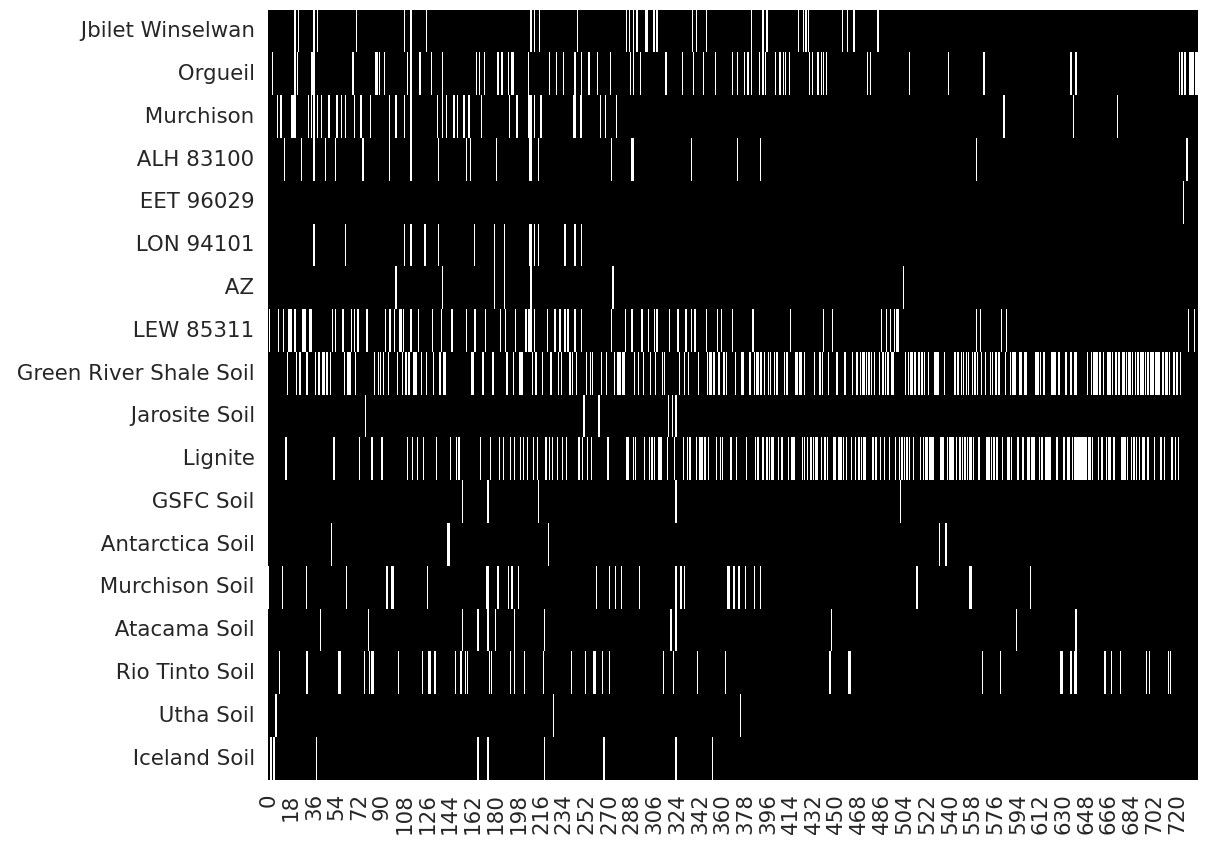

In [59]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
top_n = 1000

X_train = np.load('/usr/scratch/chromalyzer/features/features_lam1_0.75_lam2_5.0_rt1th_10_rt2th_100.npy')

train_samples = pd.read_csv('/usr/scratch/danial_stuff/Chromalyzer/data/labels.csv').reset_index(drop=True)

X_sorted = X_train[train_samples.sort_values('label').index].copy()

class_0_count = np.sum(train_samples['label'] == 0)
X_sorted[class_0_count:,:] = np.where(X_sorted[class_0_count:,:] == 1, 2, X_sorted[class_0_count:,:])


plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)

# Define colors for each value
colors = ["black", "white", "white"]  # Colors for 0, 1, and 2 respectively
cmap = mcolors.ListedColormap(colors)

# boundaries = [-0.5, 0.5, 1.5, 2.5]
# norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)


sns.heatmap(X_sorted[:,:top_n],cmap=cmap,yticklabels=train_samples.sort_values('label')['sample_name'].to_numpy() ,cbar=False)
# Save the plot as a PDF file
plt.savefig('All_features.pdf', format="pdf", bbox_inches='tight',dpi=400)

In [62]:
pd.read_csv('/usr/scratch/chromalyzer/features/features_lam1_0.75_lam2_5.0_rt1th_10_rt2th_100.csv').drop(columns=['Unnamed: 0'])

,m/z,RT1_start,RT2_start,RT1_end,RT2_end,RT1_center,RT2_center
0,30,6040.384,2.144,6040.384,2.144,6040.384,2.144
1,32,6488.896,3.472,6488.896,3.472,6488.896,3.472
2,32,6495.904,2.320,6495.904,2.320,6495.904,2.320
3,32,8335.504,1.912,8335.504,1.912,8335.504,1.912
4,32,7603.168,1.880,7603.168,1.880,7603.168,1.880
...,...,...,...,...,...,...,...
732,614,6961.936,2.016,6961.936,2.016,6961.936,2.016
733,629,7350.880,2.704,7350.880,2.704,7350.880,2.704
734,636,9327.136,2.232,9327.136,2.232,9327.136,2.232
735,663,6674.608,2.232,6674.608,2.232,6674.608,2.232


In [70]:
test = pd.read_csv('/usr/scratch/chromalyzer/lr_l2_results/top_features/lr_l2_signatures_combined.csv').drop(columns=['Unnamed: 0','p_value','samples','class'])
test.index = test.index + 1
test.head(10)

,coefficient,m/z,RT1,RT2
1,-0.026041,128.0,"[4071.136,4085.152]","[1.432,2.176]"
2,-0.025272,102.0,"[4071.136,4085.152]","[1.432,2.168]"
3,0.023625,162.0,"[5490.256,5493.76]","[1.008,1.288]"
4,-0.021509,63.0,"[4074.64,4085.152]","[1.44,2.176]"
5,0.018768,116.0,"[5490.256,5493.76]","[1.008,1.288]"
6,-0.016821,127.0,"[4071.136,4085.152]","[1.88,2.176]"
7,-0.016712,129.0,"[4071.136,4081.648]","[1.432,2.176]"
8,-0.016388,141.0,"[4743.904,4757.92]","[1.632,1.84]"
9,-0.016388,142.0,"[4743.904,4757.92]","[1.632,1.848]"
10,-0.016285,52.0,"[4071.136,4078.144]","[1.432,2.176]"


,Unnamed: 0,p_value,coefficient,m/z,RT1,RT2,samples,class
1,1,0.000316,-0.026041,128.0,"[4071.136,4085.152]","[1.432,2.176]","231003_01_AZ_400uLDCM_100oC24h.csv, 230901_07_...",0
2,2,0.000332,-0.025272,102.0,"[4071.136,4085.152]","[1.432,2.168]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
3,3,0.013657,0.023625,162.0,"[5490.256,5493.76]","[1.008,1.288]","231003_04_Icerland_Soil_300uLDCM_100oC24h.csv,...",1
4,4,0.001748,-0.021509,63.0,"[4074.64,4085.152]","[1.44,2.176]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
5,5,0.036652,0.018768,116.0,"[5490.256,5493.76]","[1.008,1.288]","231003_04_Icerland_Soil_300uLDCM_100oC24h.csv,...",1
6,6,0.016261,-0.016821,127.0,"[4071.136,4085.152]","[1.88,2.176]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
7,7,0.007487,-0.016712,129.0,"[4071.136,4081.648]","[1.432,2.176]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
8,8,0.014940,-0.016388,141.0,"[4743.904,4757.92]","[1.632,1.84]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
9,9,0.014940,-0.016388,142.0,"[4743.904,4757.92]","[1.632,1.848]","230901_07_LON94101_300uLDCM_100oC24h.csv, 2309...",0
10,10,0.008577,-0.016285,52.0,"[4071.136,4078.144]","[1.432,2.176]","230901_08_LEW85311_300uLDCM_100oC24h.csv, 2310...",0


In [75]:
import random
from statsmodels.sandbox.stats.multicomp import multipletests

# as example, all null hypotheses are true
pvals = [random.random() for _ in range(10)]
is_reject, corrected_pvals, _, _ = multipletests(pvals, alpha=0.1, method='fdr_bh')

In [76]:
is_reject

array([False,  True, False, False, False, False, False, False, False,
       False])

In [77]:
pvals

[0.32135094677240106,
 0.0026789955861592496,
 0.9191062816044157,
 0.38785043715880996,
 0.40206828933184435,
 0.6286246646788912,
 0.3329051111200324,
 0.7378663696418276,
 0.14638285092961834,
 0.5960207660220395]

In [79]:
import numpy as np

def remove_columns(matrix):
    # Compute the sum of each column
    col_sums = np.sum(matrix, axis=0)
    
    # Boolean mask for columns to keep
    # Columns are kept if their sum is not 1 or there are multiple ones
    keep_columns = (col_sums != 1) | ((col_sums == 1) & (np.max(matrix, axis=0) != 1))
    
    # Use the mask to filter out the columns
    filtered_matrix = matrix[:, keep_columns]
    
    return filtered_matrix

# Example usage
matrix = np.array([
    [0, 1, 0],
    [0, 0, 0],
    [0, 0, 0]
])

# Call the function with the example matrix
new_matrix = remove_columns(matrix)
print(new_matrix)

AttributeError: 'list' object has no attribute 'shape'

In [3]:
import pandas as pd

path = '/usr/scratch/chromalyzer/peaks/peaks_lambda1_0.75/lam2_5.0'


peaks = []
for i in range(30, 701):
    p = pd.read_csv(f'{path}/{i}.csv')
    p['m_z'] = i
    peaks.append(p)

peaks_concat = pd.concat(peaks)

peaks_concat[peaks_concat['csv_file_name'] == '230830_01_EET96029_300uLDCM_100oC24h.csv	']

/tmp/ipykernel_1021058/4117447371.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  peaks_concat = pd.concat(peaks)


,csv_file_name,peak_area,RT1_center,RT2_center,RT1_start,RT2_start,RT1_end,RT2_end,m_z
0,230830_01_EET96029_300uLDCM_100oC24h.csv,19566.0,6096.448,3.24,6096.448,3.256,6096.448,3.216,483


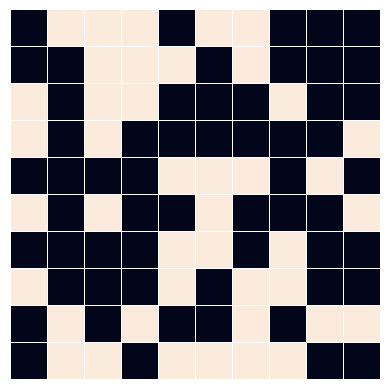

In [18]:
# Random array of 10x10 filled with 0 and 1
array = np.random.randint(0, 2, (10, 10))


import numpy as np
array = np.array(array)

# plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(array, linewidth=0.5,square=True, xticklabels=False, yticklabels=False,cbar=False)
# Save the plot as a PDF file
plt.savefig('heatmap.pdf', format="pdf", bbox_inches='tight',dpi=400)
plt.show()

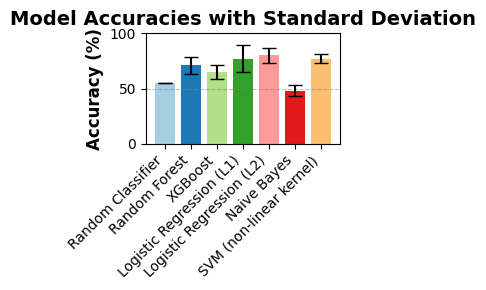

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Model details
models = ['Random Classifier', 'Random Forest', 'XGBoost', 'Logistic Regression (L1)', 
          'Logistic Regression (L2)', 'Naive Bayes', 'SVM (non-linear kernel)']
mean_accuracies = [55, 71, 65, 77, 80, 48, 77]
std_accuracies = [0, 8, 6, 12, 7, 5, 4]

# Generating sample data assuming a normal distribution
data = [np.random.normal(loc=mean, scale=std, size=100) if std > 0 else np.full(100, mean)
        for mean, std in zip(mean_accuracies, std_accuracies)]

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot
bp = ax.boxplot(data, notch=True, patch_artist=True)

# Customizing the colors of the box plots
colors = plt.cm.Paired(np.arange(len(models)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customize the plot
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Model Accuracy Distributions', fontsize=14, fontweight='bold')
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)

# Adding grid for better precision viewing
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


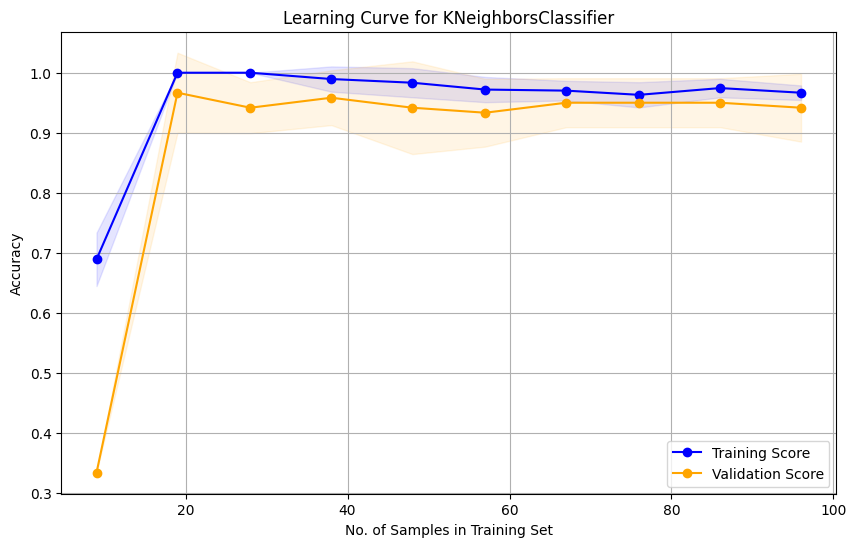

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier
model = KNeighborsClassifier()

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Validation Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Learning Curve for KNeighborsClassifier')
plt.xlabel('No. of Samples in Training Set')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


# Plotting accuracies

In [12]:
lr_l1_avg_accuracies = [61.111111111111114, 83.33333333333334, 83.33333333333334, 72.22222222222221, 83.33333333333334, 88.88888888888889, 88.88888888888889, 61.111111111111114, 94.44444444444444, 61.111111111111114]
lr_l1_std_accuracies = [39.28371006591931, 23.570226039551585, 23.570226039551585, 34.24674446093876, 23.570226039551585, 20.78698548207745, 20.78698548207745, 39.28371006591931, 15.713484026367725, 39.28371006591931]

In [13]:
lr_l2_avg_accuracies = [72.22222222222221, 83.33333333333334, 77.77777777777779, 72.22222222222221, 83.33333333333334, 88.88888888888889, 88.88888888888889, 72.22222222222221, 88.88888888888889, 77.77777777777779]
lr_l2_std_accuracies = [41.5739709641549, 23.570226039551585, 34.24674446093876, 34.24674446093876, 23.570226039551585, 20.78698548207745, 20.78698548207745, 41.5739709641549, 20.78698548207745, 34.24674446093876]

In [14]:
naive_bayes_avg_accuracies = [44.44444444444444, 50.0, 50.0, 38.88888888888889, 55.55555555555556, 50.0, 55.55555555555556, 55.55555555555556, 44.44444444444444, 44.44444444444444]
naive_bayes_std_accuracies = [36.85138655950445, 33.33333333333333, 33.33333333333333, 39.283710065919315, 36.85138655950445, 33.33333333333333, 28.327886186626582, 43.744488188954506, 28.327886186626582, 36.85138655950445]

In [15]:
rf_avg_accuracies = [72.22222222222221, 83.33333333333334, 61.111111111111114, 77.77777777777779, 61.111111111111114, 66.66666666666666, 72.22222222222221, 66.66666666666666, 83.33333333333334, 72.22222222222221]
rf_std_accuracies = [34.24674446093876, 23.570226039551585, 39.28371006591931, 34.24674446093876, 31.426968052735443, 33.33333333333333, 34.24674446093876, 40.8248290463863, 23.570226039551585, 34.24674446093876]

In [16]:
svm_avg_accuracies = [77.77777777777779, 83.33333333333334, 83.33333333333334, 72.22222222222221, 77.77777777777779, 77.77777777777779, 77.77777777777779, 72.22222222222221, 83.33333333333334, 72.22222222222221]
svm_std_accuracies = [34.24674446093876, 23.570226039551585, 33.33333333333333, 24.845199749997665, 34.24674446093876, 24.845199749997665, 34.24674446093876, 41.5739709641549, 23.570226039551585, 34.24674446093876]

In [17]:
xgboost_avg_accuracies = [61.111111111111114, 61.111111111111114, 66.66666666666666, 55.55555555555556, 66.66666666666666, 77.77777777777779, 72.22222222222221, 66.66666666666666, 61.111111111111114, 66.66666666666666]
xgboost_std_accuracies = [39.28371006591931, 31.426968052735443, 33.33333333333333, 43.744488188954506, 40.8248290463863, 34.24674446093876, 34.24674446093876, 40.8248290463863, 31.426968052735443, 40.8248290463863]

In [26]:
accuracies = [lr_l1_avg_accuracies, lr_l2_avg_accuracies, naive_bayes_avg_accuracies, rf_avg_accuracies, svm_avg_accuracies, xgboost_avg_accuracies]
stds = [lr_l1_std_accuracies, lr_l2_std_accuracies, naive_bayes_std_accuracies, rf_std_accuracies, svm_std_accuracies, xgboost_std_accuracies]

accuracies = np.array(accuracies)
stds = np.array(stds)

# plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Logistic Regression (L1)', 'Logistic Regression (L2)', 'Naive Bayes', 'Random Forest', 'SVM (non-linear kernel)', 'XGBoost']


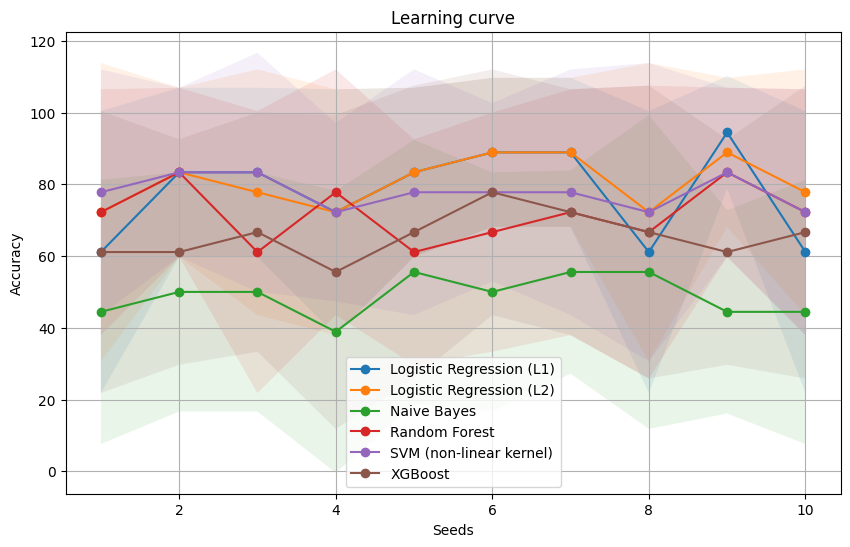

In [31]:
plt.figure(figsize=(10, 6))

for i in range(len(accuracies)):
    plt.plot(range(1,len(accuracies[i])+1), accuracies[i], 'o-', label=models[i])
    plt.fill_between(range(1,len(accuracies[i])+1), accuracies[i] - stds[i], accuracies[i] + stds[i], alpha=0.1)

plt.title('Learning curve')
plt.xlabel('Seeds')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [20]:
accuracies[0]

[61.111111111111114,
 83.33333333333334,
 83.33333333333334,
 72.22222222222221,
 83.33333333333334,
 88.88888888888889,
 88.88888888888889,
 61.111111111111114,
 94.44444444444444,
 61.111111111111114]

In [54]:
import pandas as pd
df = pd.read_csv('/usr/scratch/chromalyzer/test/lr_l2_results/top_features/lr_l2_signatures_combined.csv')
df['RT1_Center'] = df['RT1'].apply(lambda x: sum(eval(x))/2)
df['RT2_Center'] = df['RT2'].apply(lambda x: sum(eval(x))/2)
df

,Unnamed: 0,coefficient,m/z,RT1,RT2,samples,class,RT1_Center,RT2_Center
0,1,-0.104746,102.0,"[4074.64,4088.656]","[1.448,2.176]","230830_02_Orgueil_300uLDCM_100oC24h-001.csv, 2...",0,4081.648,1.812
1,2,-0.095544,128.0,"[4074.64,4092.16]","[1.44,2.168]","230901_06_ALH83100_300uLDCM_100oC24h.csv, 2309...",0,4083.400,1.804
2,3,0.089702,138.0,"[2687.056,2687.056]","[0.816,0.912]","231003_04_Icerland_Soil_300uLDCM_100oC24h.csv,...",1,2687.056,0.864
3,4,0.089702,152.0,"[2687.056,2687.056]","[0.816,0.912]","231003_04_Icerland_Soil_300uLDCM_100oC24h.csv,...",1,2687.056,0.864
4,5,0.089352,116.0,"[5490.256,5493.76]","[1.008,1.288]","231003_04_Icerland_Soil_300uLDCM_100oC24h.csv,...",1,5492.008,1.148
...,...,...,...,...,...,...,...,...,...
1035,1036,-0.000995,182.0,"[6587.008,6597.52]","[1.432,1.592]",230823_04_Murchison_Soil_300uLDCM_100oC24h-001...,0,6592.264,1.512
1036,1037,-0.000303,234.0,"[7957.072,7960.576]","[1.912,1.928]","230830_03_Lignite_300uLDCM_100oC24h-001.csv, 2...",0,7958.824,1.920
1037,1038,-0.000303,219.0,"[7925.536,7960.576]","[1.272,1.928]","230830_03_Lignite_300uLDCM_100oC24h-001.csv, 2...",0,7943.056,1.600
1038,1039,-0.000303,206.0,"[7498.048,7508.56]","[2.128,2.144]","230830_03_Lignite_300uLDCM_100oC24h-001.csv, 2...",0,7503.304,2.136


In [4]:
import numpy as np

np.load('/usr/scratch/chromalyzer/heatmaps/230901_08_LEW85311_300uLDCM_100oC24h.csv/30.npy').shape

(439, 2643)

In [16]:
np.load('/usr/scratch/chromalyzer/heatmaps/230823_07_Green_River_Shale_Soil_500uLDCM_100oC24h.csv/128_second_time.npy')

array([3.504, 3.496, 3.488, 3.48 , 3.472, 3.464, 3.456, 3.448, 3.44 ,
       3.432, 3.424, 3.416, 3.408, 3.4  , 3.392, 3.384, 3.376, 3.368,
       3.36 , 3.352, 3.344, 3.336, 3.328, 3.32 , 3.312, 3.304, 3.296,
       3.288, 3.28 , 3.272, 3.264, 3.256, 3.248, 3.24 , 3.232, 3.224,
       3.216, 3.208, 3.2  , 3.192, 3.184, 3.176, 3.168, 3.16 , 3.152,
       3.144, 3.136, 3.128, 3.12 , 3.112, 3.104, 3.096, 3.088, 3.08 ,
       3.072, 3.064, 3.056, 3.048, 3.04 , 3.032, 3.024, 3.016, 3.008,
       3.   , 2.992, 2.984, 2.976, 2.968, 2.96 , 2.952, 2.944, 2.936,
       2.928, 2.92 , 2.912, 2.904, 2.896, 2.888, 2.88 , 2.872, 2.864,
       2.856, 2.848, 2.84 , 2.832, 2.824, 2.816, 2.808, 2.8  , 2.792,
       2.784, 2.776, 2.768, 2.76 , 2.752, 2.744, 2.736, 2.728, 2.72 ,
       2.712, 2.704, 2.696, 2.688, 2.68 , 2.672, 2.664, 2.656, 2.648,
       2.64 , 2.632, 2.624, 2.616, 2.608, 2.6  , 2.592, 2.584, 2.576,
       2.568, 2.56 , 2.552, 2.544, 2.536, 2.528, 2.52 , 2.512, 2.504,
       2.496, 2.488,

In [11]:
np.load('/usr/scratch/chromalyzer/heatmaps/230901_08_LEW85311_300uLDCM_100oC24h.csv/30_first_time.npy')

array([ 2200.   ,  2203.504,  2207.008, ..., 11450.56 , 11454.064,
       11457.568])

In [6]:
np.load('/usr/scratch/chromalyzer/heatmaps/230901_08_LEW85311_300uLDCM_100oC24h.csv/30_second_time.npy')

array([3.504, 3.496, 3.488, 3.48 , 3.472, 3.464, 3.456, 3.448, 3.44 ,
       3.432, 3.424, 3.416, 3.408, 3.4  , 3.392, 3.384, 3.376, 3.368,
       3.36 , 3.352, 3.344, 3.336, 3.328, 3.32 , 3.312, 3.304, 3.296,
       3.288, 3.28 , 3.272, 3.264, 3.256, 3.248, 3.24 , 3.232, 3.224,
       3.216, 3.208, 3.2  , 3.192, 3.184, 3.176, 3.168, 3.16 , 3.152,
       3.144, 3.136, 3.128, 3.12 , 3.112, 3.104, 3.096, 3.088, 3.08 ,
       3.072, 3.064, 3.056, 3.048, 3.04 , 3.032, 3.024, 3.016, 3.008,
       3.   , 2.992, 2.984, 2.976, 2.968, 2.96 , 2.952, 2.944, 2.936,
       2.928, 2.92 , 2.912, 2.904, 2.896, 2.888, 2.88 , 2.872, 2.864,
       2.856, 2.848, 2.84 , 2.832, 2.824, 2.816, 2.808, 2.8  , 2.792,
       2.784, 2.776, 2.768, 2.76 , 2.752, 2.744, 2.736, 2.728, 2.72 ,
       2.712, 2.704, 2.696, 2.688, 2.68 , 2.672, 2.664, 2.656, 2.648,
       2.64 , 2.632, 2.624, 2.616, 2.608, 2.6  , 2.592, 2.584, 2.576,
       2.568, 2.56 , 2.552, 2.544, 2.536, 2.528, 2.52 , 2.512, 2.504,
       2.496, 2.488,

In [7]:
import numpy as np

np.load('/usr/scratch/chromalyzer/TII_aligned/230823_02_Rio_Tinto_Soil_300uLDCM_100oC24h.csv/30.npy').shape

(439, 2643)

In [8]:
import pandas as pd

df = pd.read_csv('/usr/scratch/chromalyzer/peaks/combined.csv')

In [18]:
df[df['label'] == 0].value_counts('csv_file_name').mean()

98.375

In [2]:
raw_path = '/usr/scratch/NASA/raw/'
samples = pd.read_csv('data/labels.csv')

min_index = []
max_index = []

min_spectrum = []
max_spectrum = []

min_TOF = []
max_TOF = []

min_mz = []
max_mz = []

min_area = []
max_area = []

min_resolutions = []
max_resolutions = []

for index, row in samples.iterrows():
    raw_sample = pd.read_csv(f'{raw_path}{row["csv_file_name"]}')
    min_spectrum.append(raw_sample['Spectrum'].min())
    max_spectrum.append(raw_sample['Spectrum'].max())
    min_TOF.append(raw_sample['TOF'].min())
    max_TOF.append(raw_sample['TOF'].max())
    min_mz.append(raw_sample['M/Z'].min())
    max_mz.append(raw_sample['M/Z'].max())
    min_area.append(raw_sample['Area'].min())
    max_area.append(raw_sample['Area'].max())
    min_resolutions.append(raw_sample['Resolution'].min())
    max_resolutions.append(raw_sample['Resolution'].max())
    min_index.append(raw_sample.index.min())
    max_index.append(raw_sample.index.max())

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [10]:
import numpy as np
np.array([29.99843, 29.99782, 29.99789, 29.99785, 29.99778, 29.99784, 29.99864, 29.99853, 29.99943, 29.99785, 29.99875, 29.99938, 29.99941, 29.99829, 29.99789, 29.99844, 29.99934, 29.99873]).min()

478162.121

In [ ]:
239830302, 203196047, 252945188, 211575587, 328167911, 243963336, 468314092, 269381348, 331055456, 231651707, 535018068, 368438038, 338508822, 348073641, 242645247, 280354772, 451958508, 404241440